In [15]:
# import libraries
import numpy as np
import pandas as pd 


## Load dataset

In [16]:
df=pd.read_csv("Carseats.csv")

In [17]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [18]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [19]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

## using label encoder convert string to int

In [20]:
l=["ShelveLoc","Urban","US"]
from sklearn.preprocessing import LabelEncoder
for i in l:
    le=LabelEncoder()
    le.fit(df[i])
    df[i]=le.transform(df[i])

In [21]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


## independat and dependant variable separation

In [22]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

## split the data in train and test side 

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=11)

## fitting the model

In [26]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
DT=DecisionTreeRegressor(criterion="squared_error")

## fit the training data

In [30]:
DT.fit(x_train,y_train)

DecisionTreeRegressor()

## predict the output using new observation (x_test)

In [31]:
y_pred=DT.predict(x_test)

In [33]:
y_pred

array([ 3.42,  6.14,  4.78,  8.77,  2.23,  7.8 ,  9.14,  8.23,  6.15,
        6.14,  5.16,  5.21,  4.9 ,  7.41,  6.8 , 10.1 ,  7.52,  8.01,
       10.01,  9.  ,  6.2 ,  6.95,  8.21,  8.71, 12.29, 10.08,  8.01,
        2.05,  2.67,  1.82,  4.96,  2.34,  9.53,  7.53,  7.45,  7.8 ,
        1.82,  9.49, 13.28, 11.7 ,  4.2 ,  7.43,  4.15, 10.43,  6.88,
        8.74,  4.1 ,  6.53,  4.69,  9.1 ,  5.27,  8.86,  4.43,  5.86,
        7.7 , 11.27, 11.27,  5.08,  9.  ,  8.01, 10.59,  7.23,  7.23,
        4.97,  4.38,  6.1 ,  7.64, 10.51,  9.49,  5.28,  5.99,  7.62,
        6.87, 12.53,  9.39,  7.8 ,  6.2 , 11.93,  7.56,  6.2 , 13.55,
        4.2 , 11.27, 10.08,  4.2 ,  9.14,  3.42,  4.12,  7.4 ,  4.67,
        7.77,  2.05,  5.25,  7.56,  8.74,  7.62,  2.05,  4.78,  4.68,
        8.47,  8.77,  6.67,  6.2 ,  3.47,  2.23,  7.7 ,  7.64,  7.49,
        9.58,  8.31,  5.86, 10.21,  5.28, 11.54, 11.27,  5.61, 11.54,
        8.23,  6.68,  7.63])

In [34]:
y_test

276     6.93
274     7.22
164     8.22
393     5.57
136     5.17
       ...  
153     5.93
298    10.98
104     4.62
83      4.42
246     6.90
Name: Sales, Length: 120, dtype: float64

## mean_squared_error

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
mse=mean_squared_error(y_test,y_pred)

In [38]:
mse

5.4963525

In [40]:
np.sqrt(mse)

2.344430101325267

## r2_score

In [43]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)*100

38.93991202888641

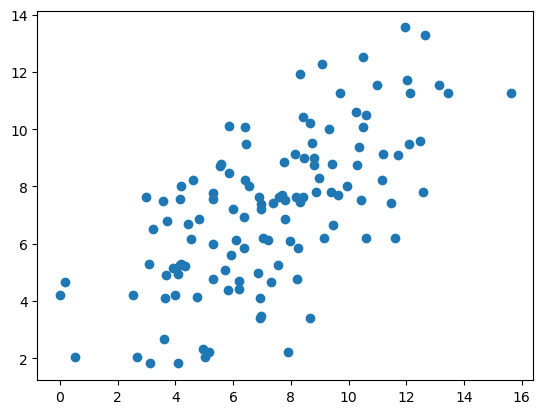

In [50]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)